In [243]:
from preprocess import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

sns.set_style('whitegrid')

In [244]:
df1 = pd.read_csv('data/document_characterisation_aicore_initial.csv')

In [245]:
df2 = pd.read_csv('data/DocumentDump.csv')

In [246]:
# drop rows with bad url links
df2 = df2[df2['URL'].str.startswith('http')]

In [247]:
df2.head()

,URL,CLASS
0,https://issafrica.org/iss-today/time-to-tackle...,Analytical Report
1,http://www.understandingwar.org/backgrounder/r...,Analytical Report
2,http://www.understandingwar.org/backgrounder/r...,Analytical Report
3,http://www.understandingwar.org/backgrounder/w...,Analytical Report
4,http://www.understandingwar.org/backgrounder/r...,Analytical Report


In [248]:
df2.columns = ['url', 'class_label']

In [249]:
mapper = {
    'Incident Report': 0,
    'Situation Report': 1,
    'Profile Report': 2,
    'Analytical Report': 3
}

In [250]:
df2['class_id'] = df2['class_label'].map(mapper)
df1['class_label'][df1['class_label']=='Report'] = 'Profile Report'

In [251]:
df3 = pd.read_csv('data/public_urls.txt', sep='\n', header=None, names=['url', 'class_id'])
df3['class_id'] = 3
df3['class_label'] = 'Analytical Report'
df3.head()

,url,class_id,class_label
0,https://www.csis.org/analysis/chronology-possi...,3,Analytical Report
1,https://www.csis.org/analysis/reintroducing-am...,3,Analytical Report
2,https://www.csis.org/analysis/us-japan-allianc...,3,Analytical Report
3,https://www.csis.org/analysis/battle-mekelle-a...,3,Analytical Report
4,https://www.longwarjournal.org/archives/2020/1...,3,Analytical Report


In [252]:
print(len(df1), len(df2), len(df3))

60 117 27


In [253]:
df = pd.concat([df1, df2, df3], axis=0, join='outer', ignore_index=True)
print(len(df))
print(df['class_label'].value_counts())
df.tail(40)

204
Profile Report       100
Analytical Report     50
Situation Report      29
Incident Report       25
Name: class_label, dtype: int64


,url,class_label,class_id
164,https://rewardsforjustice.net/english/murat_ka...,Profile Report,2
165,https://rewardsforjustice.net/english/hamad_el...,Profile Report,2
166,https://rewardsforjustice.net/english/fuad_kha...,Profile Report,2
167,https://rewardsforjustice.net/english/bashir_m...,Profile Report,2
168,https://rewardsforjustice.net/english/mohamed_...,Profile Report,2
169,https://rewardsforjustice.net/english/abu_al_m...,Profile Report,2
170,https://rewardsforjustice.net/english/jehad_mo...,Profile Report,2
171,https://rewardsforjustice.net/english/ahmad_al...,Profile Report,2
172,https://rewardsforjustice.net/english/muhammad...,Profile Report,2
173,https://rewardsforjustice.net/english/abdelkar...,Profile Report,2


In [254]:
# hide
# scrape texts from urls and save in the given directory
# bad_url = url_to_file(df, 'url', './data/text/')       

# Then hand scrape the rest with the bad_url

In [255]:
df['text'] = None
df = add_text_to_df('./data/text/', df, 'text')

In [256]:
df = text_to_df('data/0/', df, col_names=['text', 'class_id'])
df = text_to_df('data/1/', df, col_names=['text', 'class_id'])
df = text_to_df('data/3/', df, col_names=['text', 'class_id'])


In [257]:
mapper = {
    0: 'Incident Report',
    1: 'Situation Report',
    2: 'Profile Report',
    3: 'Analytical Report'
}
df['class_label'] = df['class_id'].map(mapper)
df['class_label'].value_counts()

Profile Report       100
Situation Report      99
Incident Report       88
Analytical Report     74
Name: class_label, dtype: int64

In [258]:
with open('data.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('data.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [260]:
df = clean_texts(df, 'text')

KeyboardInterrupt: 

In [ ]:
df = feature_extraction(df, 'text')

Average length of documents: 1152.4114441416893
Median length of documents: 671.0


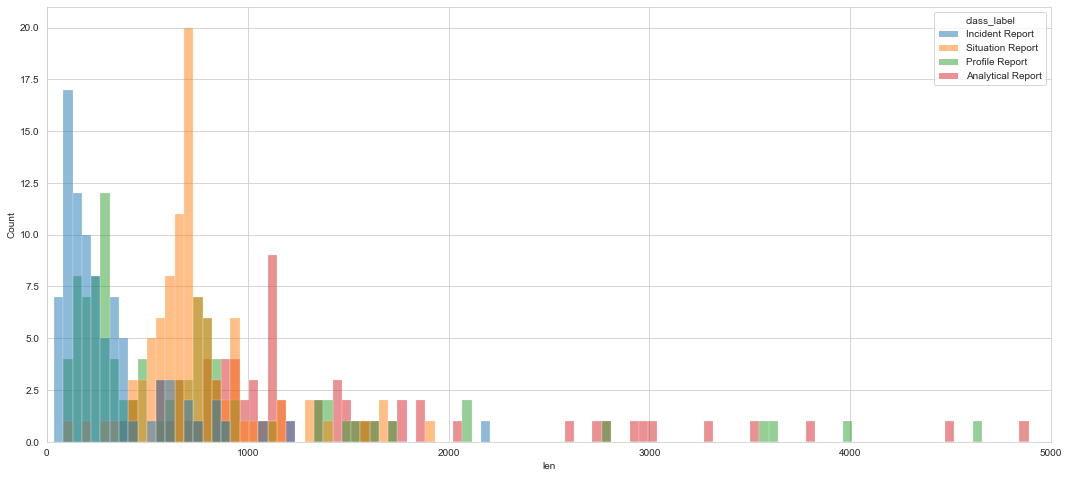

In [212]:
plt.figure(figsize=(18,8))
sns.histplot(df, x='len', hue='class_label', bins=500)
plt.xlim((0, 5000))
print('Average length of documents:', df['len'].mean())
print('Median length of documents:', df['len'].median())

Text(0.5, 1.0, 'Length of text by report type')

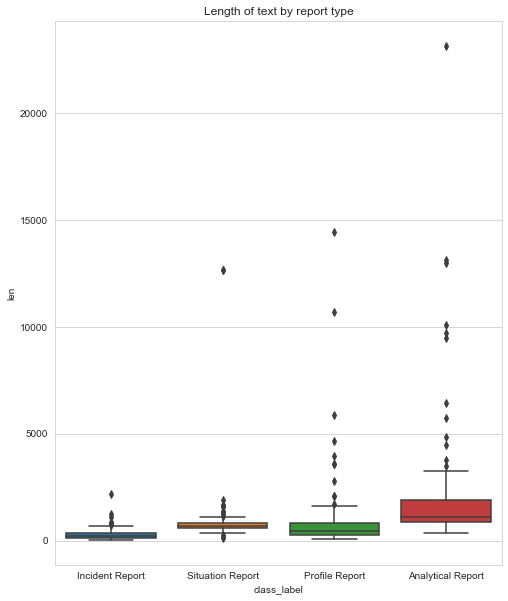

In [52]:
plt.figure(figsize=(8,10))
sns.boxplot(data=df, x='class_label', y='len')
plt.title('Length of text by report type')

<AxesSubplot:xlabel='class_label', ylabel='ne_count'>

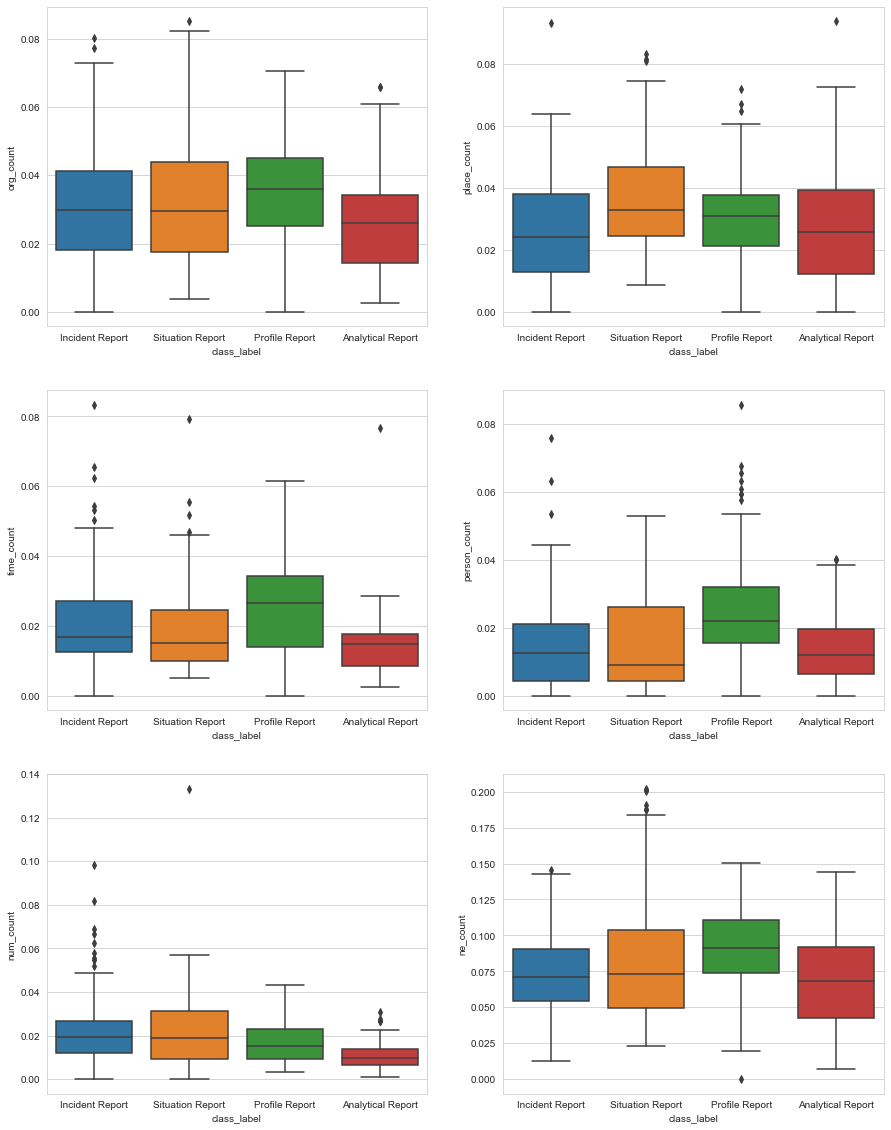

In [217]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
sns.boxplot(data=df, x='class_label', y='org_count', ax=axs[0][0])
sns.boxplot(data=df, x='class_label', y='place_count', ax=axs[0][1])
sns.boxplot(data=df, x='class_label', y='time_count', ax=axs[1][0])
sns.boxplot(data=df, x='class_label', y='person_count', ax=axs[1][1])
sns.boxplot(data=df, x='class_label', y='num_count', ax=axs[2][0])
sns.boxplot(data=df, x='class_label', y='ne_count', ax=axs[2][1])

### Iterative process:
Random forest -> Study misclassified -> Feature extraction -> Random forest ->...</n>
Fit models using: </n>
```python
from sklearn.model_selection import train_test_split
X = df[list of features]
y = df['class_label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)
cls_names = ['Incident Report', 'Situation Report', 'Profile report', 'Analytical report']
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print(classification_report(y_val, y_pred, target_names=cls_names))
print(confusion_matrix(y_val, y_pred))
```
* First fit 'len', 'org_count', 'place_count', 'time_count', 'person_count', 'num_count' </n>
Result:
```python
                   precision    recall  f1-score   support

  Incident Report       0.71      0.75      0.73        16
 Situation Report       0.83      0.83      0.83        18
   Profile report       0.75      0.75      0.75        20
Analytical report       0.84      0.80      0.82        20

         accuracy                           0.78        74
        macro avg       0.78      0.78      0.78        74
     weighted avg       0.79      0.78      0.78        74

[[12  0  1  3]
 [ 0 15  3  0]
 [ 2  3 15  0]
 [ 3  0  1 16]]
 ```
Looks like the model is on the way to something good. But not good yet. Notice the model confuses incident report with analytical report, and also with situation report with profile report. 
 ```python
y_pred = rf.predict(X)
compare = pd.DataFrame(y[y_pred!=y])
compare['pred_label'] = y_pred[y_pred!=y]
print(compare)
```
Looking at instances of misclassification, I have the following thoughts:</n>
 1. incident report and analytical report maybe separated using feature(s) of repeated NE.
 2. feature(s) of vocabulary could be useful to separate out analytical report.
 3. some information in other tags are not captured (header, strong, etc.), need to update scraper.
 


In [198]:
X = df[['len', 'org_count', 'place_count', 'time_count', 'person_count', 'num_count']]
y = df['class_label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)
cls_names = ['Incident Report', 'Situation Report', 'Profile report', 'Analytical report']
rf = RandomForestClassifier(
    n_estimators=500, 
    max_features=0.8, 
    # max_depth=3, 
    min_samples_leaf=2
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print(classification_report(y_train, rf.predict(X_train), target_names=cls_names))
print(classification_report(y_val, y_pred, target_names=cls_names))
print(confusion_matrix(y_val, y_pred))

                   precision    recall  f1-score   support

  Incident Report       0.95      0.98      0.97        64
 Situation Report       0.97      0.97      0.97        70
   Profile report       0.99      0.99      0.99        80
Analytical report       0.99      0.96      0.97        79

         accuracy                           0.98       293
        macro avg       0.98      0.98      0.98       293
     weighted avg       0.98      0.98      0.98       293

                   precision    recall  f1-score   support

  Incident Report       0.71      0.75      0.73        16
 Situation Report       0.71      0.67      0.69        18
   Profile report       0.61      0.70      0.65        20
Analytical report       0.82      0.70      0.76        20

         accuracy                           0.70        74
        macro avg       0.71      0.70      0.71        74
     weighted avg       0.71      0.70      0.70        74

[[12  0  2  2]
 [ 1 12  5  0]
 [ 1  4 14  1]
 [ 3 

In [80]:
y_pred = rf.predict(X)
compare = pd.DataFrame(y[y_pred!=y])
compare['pred_label'] = y_pred[y_pred!=y]
print(compare)

           class_label         pred_label
14     Incident Report     Profile Report
34      Profile Report    Incident Report
53   Analytical Report   Situation Report
57   Analytical Report   Situation Report
98      Profile Report  Analytical Report
139     Profile Report    Incident Report
144     Profile Report    Incident Report
148     Profile Report    Incident Report
150     Profile Report    Incident Report
169     Profile Report    Incident Report
214    Incident Report     Profile Report
234    Incident Report     Profile Report
254    Incident Report     Profile Report
259    Incident Report  Analytical Report
289   Situation Report    Incident Report
322   Situation Report  Analytical Report
335   Situation Report    Incident Report
342   Situation Report     Profile Report
364  Analytical Report   Situation Report


In [56]:
compare.index

Int64Index([45, 49, 62, 75, 81, 95, 100, 119, 140, 146, 195, 212, 214, 215,
            317, 325],
           dtype='int64')

In [58]:
from spacy.pipeline import merge_entities
import en_core_web_lg
nlp = en_core_web_lg.load()
nlp.add_pipe(merge_entities)
dir_='data/text/'
for idx in compare.index:
    with open(dir_+str(idx)+'.txt', 'r') as file:
        text = file.read().replace('\n', ' ')
        doc = nlp(text)
        length = len(set(doc.ents))/len(doc)
        rep_ents = len(doc.ents)/len(set(doc.ents))
        print(len(set(doc.ents)), len(doc.ents))
        # print(doc.ents)
        label = df['class_label'][idx]
        pred_label = y_pred[idx]
        print(length, rep_ents, label, pred_label)

1957 1957
0.1295425961474813 1.0 Analytical Report Situation Report
65 65
0.1329243353783231 1.0 Analytical Report Situation Report
139 139
0.16013824884792627 1.0 Analytical Report Situation Report
216 216
0.11291165708311553 1.0 Situation Report Analytical Report
207 207
0.15517241379310345 1.0 Situation Report Analytical Report
235 235
0.12038934426229508 1.0 Profile Report Analytical Report
914 914
0.1382544244441083 1.0 Profile Report Analytical Report
45 45
0.08256880733944955 1.0 Profile Report Incident Report
12 12
0.1 1.0 Profile Report Incident Report
10 10
0.08771929824561403 1.0 Profile Report Incident Report
380 380
0.12175584748478052 1.0 Analytical Report Profile Report


FileNotFoundError: [Errno 2] No such file or directory: 'data/text/212.txt'

In [ ]:
with open('data/text/45.txt', 'r') as file:
    text = file.read().replace('\n', ' ')
    doc = nlp(text)
    length = len(set(doc.ents))/len(doc)
    rep_ents = len(doc.ents)/len(set(doc.ents))
    print(len(set(doc.ents)), len(doc.ents))
    # print(doc.ents)
    label = df['class_label'][idx]
    pred_label = y_pred[idx]
    print(length, rep_ents, label, pred_label)